# Question 1: Did Brexit Negatively Influence Financial Services Sector?

In [1]:
#List of libraries that are needed for this code:
import requests
import pprint as pp
import datetime
from datetime import date 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
import time
from statistics import mean

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
def call_api_with(url_extension):
    your_company_house_api_key ="02ad59c5-9212-4a34-9ecc-cfc988ec2023"
    login_headers = {"Authorization":your_company_house_api_key}
    url = f"https://api.companieshouse.gov.uk/{url_extension}"
    print(f'requesting: {url}') 
    res = requests.get(url, headers=login_headers)
    if res.status_code == 200:
        return res.json()
    else:
        print("status code is not 'SUCCESS 200'. Will wait 20 seconds")
        time.sleep(20) # sleep X seconds
        return call_api_with(url_extension)
    
# test to get one company
def get_one_test_company_or_error():
    url = f"search/companies?q=shop&items_per_page=1"
    return call_api_with(url)

def search_for_companies_with_query(query, number_of_companies = 100):
    # for simplicity round up the number of returned companies to the nearest hundred. eg. 130 becomes 200
    page_size = 100
    number_of_pages = math.ceil(number_of_companies / page_size) # round up
    companies = []
    for page_index in range(0, number_of_pages):
        url = f"search/companies?q={query}&items_per_page={page_size}&start_index={page_index*page_size}"
        companies += call_api_with(url).get('items', [])
    return companies
        
# request to get company data based on company number
def data_for_company(company_number):
    url = f"company/{company_number}"
    return call_api_with(url)

#request to get status of company
def status_of_company(company_number):
    url = f"company/{company_number}/company_status"
    return call_api_with(url)

# get all persons with significant control from company which contains specific keyword
def all_persons_in_company(company_number):
    url = f"company/{company_number}/persons-with-significant-control"
    return call_api_with(url).get('items', [])

def detailed_info_about_companies_with_ids(companies_numbers):
    results = []
    for company_number in companies_numbers:
        results.append(data_for_company(company_number))
    return results

In [3]:
#variable is created to contain the financial services companies
fin_companies = search_for_companies_with_query("financial" + "service", 600)
pp.pprint(len(fin_companies))


requesting: https://api.companieshouse.gov.uk/search/companies?q=financialservice&items_per_page=100&start_index=0
requesting: https://api.companieshouse.gov.uk/search/companies?q=financialservice&items_per_page=100&start_index=100
requesting: https://api.companieshouse.gov.uk/search/companies?q=financialservice&items_per_page=100&start_index=200
requesting: https://api.companieshouse.gov.uk/search/companies?q=financialservice&items_per_page=100&start_index=300
requesting: https://api.companieshouse.gov.uk/search/companies?q=financialservice&items_per_page=100&start_index=400
requesting: https://api.companieshouse.gov.uk/search/companies?q=financialservice&items_per_page=100&start_index=500
164


In [4]:
england_fin=[]
for company in fin_companies:
    if 'country' in company["address"]:
        if company["address"]['country']=='England':
            england_fin.append(company)
print(len(england_fin))            
#from the 600 companies that are pulled, 186 of them are located in England

42


In [5]:
#variable is created to store a list of statuses (active or dissolved) for the financial services companies
status_fin = [company['company_status'] 
            for company in england_fin]

#function that returns the number of instances of a particular status in a list  is defined
def fin_status(status_fin, status_name):
    fin_this_status = [status_name
                                    for i in status_fin
                                    if i == status_name]
    
    if len(fin_this_status) > 0:
        return len(fin_this_status) 
    else:
        return None
    
print(fin_status(status_fin, 'active'))
print(fin_status(status_fin, 'dissolved'))

19
23


At the first part of the code, companies were filtered by key words and country. 600 companies from the dataset were pulled with query "financial services". From the pulled 600 companies, 186 of them were in England. Finally, the last part of the code shows that 186 of the 102 companies are currently active.

Number of unique elements in the list:  21


<BarContainer object of 21 artists>

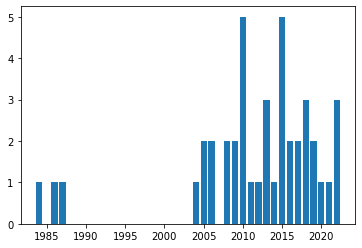

In [6]:
#a variable is created to store a list of years of creation for the financial services companies
creation_year_fin=[company['date_of_creation'][0:4] 
            for company in england_fin]
creation_year_fin

for i in range(0, len(creation_year_fin)):
    creation_year_fin[i] = int(creation_year_fin[i])
    
number_of_unique_elements = len(set(creation_year_fin))
print("Number of unique elements in the list: ", number_of_unique_elements)
set(creation_year_fin)
x = Counter(creation_year_fin)
plt.bar(x.keys(), x.values())

The graph above illustrates how many companies were founded each year. To achieve this graph, X variable is defined as a Counter class. Then the graph is plotted with keys and values of X.

In [7]:
#the year of cessation of financial services companies that are dissolved are appended to ces_years_fin list
#for calculation, if the company is not dissolved, 0 is appended instead of the year of cessation
ces_years_fin=[]

for company in england_fin:
                     
    if 'date_of_cessation' in company:
        ces_years_fin.append(company['date_of_cessation'][0:4]),
    else: ces_years_fin.append('0')

print(len(ces_years_fin))

42


<BarContainer object of 10 artists>

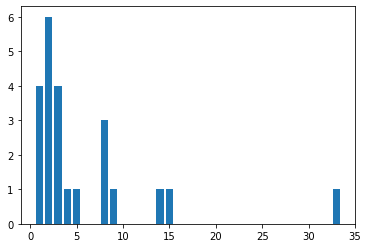

In [8]:
#Lifespan of all dissolved financial services companies in England is appended to difference_fin list
list1 = list(map(int,ces_years_fin))
list2= list(map(int,creation_year_fin))

difference_fin = []

zip_object_fin = zip(list1, list2)
for list1_i, list2_i in zip_object_fin:
    difference_fin.append(list1_i-list2_i)


    for item1 in difference_fin: 
        if item1 < 0: 
           difference_fin.remove(item1)
#print(difference_fin)
y = Counter(difference_fin)
plt.bar(y.keys(), y.values())

Lifespan of the dissolved companies are shown in the graph above. It can be seen that newly established financial services companies dissolve within the first five years.

In [9]:
recent_fin=[]
for company in england_fin:
    if 'date_of_cessation' in company:
        if company['date_of_cessation'][0:4] in ["2017", "2018", "2019", "2020", "2021"]:
            recent_fin.append(company)
print(len(recent_fin))            
#between 2017 and 2021, 66 financial services companies were shut down

12


In [10]:
founded_17, founded_18, founded_19, founded_20, founded_21 = ([] for i in range(5)) 

for company in england_fin:
    if company['date_of_creation'][0:4] == "2017":
        founded_17.append(company)

for company in england_fin:
    if company['date_of_creation'][0:4] == "2018":
        founded_18.append(company)

for company in england_fin:
    if company['date_of_creation'][0:4] == "2019":
        founded_19.append(company)
            
for company in england_fin:
    if company['date_of_creation'][0:4] == "2020":
        founded_20.append(company)
            
for company in england_fin:
    if company['date_of_creation'][0:4] == "2021":
        founded_21.append(company)
          
                
print("2017:", len(founded_17), "\n", "2018:", len(founded_18), "\n", "2019:", len(founded_19), "\n", "2020:", len(founded_20), "\n", "2021:", len(founded_21))
#number of companies that were founded down each year are appended to seperated lists

2017: 2 
 2018: 3 
 2019: 2 
 2020: 1 
 2021: 1


In [11]:
close_year_fin=[]
closed_17, closed_18, closed_19, closed_20, closed_21 = ([] for i in range(5)) 

for company in england_fin:
    if 'date_of_cessation' in company:
        if company['date_of_cessation'][0:4] == "2017":
            closed_17.append(company)

for company in england_fin:
    if 'date_of_cessation' in company:
        if company['date_of_cessation'][0:4] == "2018":
            closed_18.append(company)

for company in england_fin:
    if 'date_of_cessation' in company:
        if company['date_of_cessation'][0:4] == "2019":
            closed_19.append(company)
            
for company in england_fin:
    if 'date_of_cessation' in company:
        if company['date_of_cessation'][0:4] == "2020":
            closed_20.append(company)
            
for company in england_fin:
    if 'date_of_cessation' in company:
        if company['date_of_cessation'][0:4] == "2021":
            closed_21.append(company)
          
                
print("2017:", len(closed_17), "\n", "2018:", len(closed_18), "\n", "2019:", len(closed_19), "\n", "2020:", len(closed_20), "\n", "2021:", len(closed_21))
#number of companies that were shut down each year

2017: 3 
 2018: 3 
 2019: 3 
 2020: 0 
 2021: 3


In [12]:
recent_fin1 = []
for company in england_fin:
    if company['date_of_creation'][0:4] in ["2017", "2018", "2019", "2020", "2021"]:
        recent_fin1.append(company)
            
print(len(recent_fin1))
#We have filtered the financial services companies that were created between 2017 and 2021

9


In [13]:
dissolved_recent_fin1 = []

for company in recent_fin1:
    if 'date_of_cessation' in company:
        dissolved_recent_fin1.append(company)
        
print(len(dissolved_recent_fin1))
#Below are the cafes that were created in last 3 years and shut down after

4


In [14]:
print(len(recent_fin1))
print(len(dissolved_recent_fin1))
#From the 54 financial services companies that are founded between 2017 and 2021, 18 of them are closed

9
4


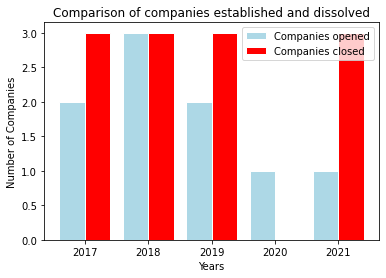

In [15]:
#Bar Graph of companies
x = [len(founded_17), len(founded_18), len(founded_19), len(founded_20), len(founded_21)]
y = [len(closed_17), len(closed_18), len(closed_19), len(closed_20), len(closed_21)]
z = ['2017', '2018', '2019', '2020', '2021']
  
z_axis = np.arange(len(z))
  
plt.bar(z_axis - 0.2, x, 0.4, label = 'Companies opened', color = 'lightblue', edgecolor = 'white' )
plt.bar(z_axis + 0.2, y, 0.4, label = 'Companies closed', color = 'red', edgecolor = 'white')
  
plt.xticks(z_axis, z)
plt.xlabel("Years")
plt.ylabel("Number of Companies")
plt.title("Comparison of companies established and dissolved")
plt.legend()
plt.show()

Brexit, which was a withdrawal of the United Kingdom from the European Union, has impacted the country by all means. Many sectors are affected, and the financial services sector is among the worst. Hence in this code, financial services companies founded in England are examined. For the data, the Companies House dataset is used. First, the data is explored with the help of graphs and other code outputs (how many companies are founded/dissolved each year, the total number of companies that are founded/dissolved between specific years). Between 2017 (the year when Brexit was first discussed) and 2021, 54 companies were established. However, 18 of these companies were dissolved. If the companies founded before 2017 are taken into account, the dissolved company number jumps to 66. The bar chart at the end of the code implies that between 2019 (the year Brexit was accepted) and 2021, the number of dissolved/founded companies rose from the previous two years. It can be concluded that Brexit influenced the financial services sector; however, companies founded before 2017 performed worse than those founded after 2017. 

# Question 2: What is the best place in UK to open a kebab restaurant?

In [16]:
kebab_rest = search_for_companies_with_query("kebab", 1000)
pp.pprint(len(kebab_rest))

requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=0
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=100
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=200
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=300
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=400
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=500
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=600
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=700
requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=800
requesting: https://api.companieshouse.gov.uk/se

In [17]:
rest = []
for restaurant in kebab_rest:
    if 'locality' in restaurant["address"]:
        rest.append(restaurant)
#print(len(rest))            
#rest
#to filter restaurants based on the locations, we listed restaurants with known localities

In [18]:
cities = []
for restaurant in kebab_rest:
    if 'locality' in restaurant["address"]:
        cities.append(restaurant["address"]["locality"])
        
#a list is created to store the localities of the kebab restaurants.

In [19]:
x = Counter(cities)
#x.most_common()

In [20]:
kebab_london = []

for restaurant in kebab_rest:
    if 'locality' in restaurant["address"]:
        if restaurant["address"]["locality"] == "London":
            kebab_london.append(restaurant)

#kebab restaurants that are located in London are added to a seperate list

Number of closed kebab restaurants in London: 67
Number of closed kebab restaurants in london: 167


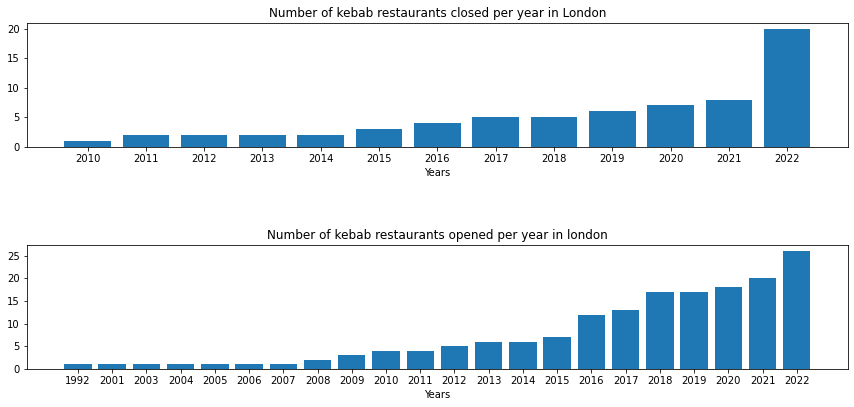

In [21]:
closed_london_kebab = []
opened_london_kebab = []

for restaurant in kebab_london:
    if "date_of_cessation" in restaurant:
        closed_london_kebab.append(restaurant["date_of_cessation"][0:4])
        
print("Number of closed kebab restaurants in London:", len(closed_london_kebab))
set(closed_london_kebab)
x = Counter(closed_london_kebab)

for restaurant in kebab_london:
    opened_london_kebab.append(restaurant["date_of_creation"][0:4])
    
print("Number of closed kebab restaurants in london:", len(opened_london_kebab))
set(opened_london_kebab)
y = Counter(opened_london_kebab)

plt.subplot(2, 1, 1)
plt.title("Number of kebab restaurants closed per year in London")
plt.xlabel("Years")
plt.bar(sorted(x.keys()), sorted(x.values()))

plt.subplot(2, 1, 2)
plt.title("Number of kebab restaurants opened per year in london")
plt.xlabel("Years")
plt.bar(sorted(y.keys()), sorted(y.values()))

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=2, 
                    top=1.5, 
                    wspace=0.1, 
                    hspace=0.8)

Bar plots above show the numbers of the yearly opened and closed kebab restaurants. Now, the length of survival will be calculated for the closed kebab restaurants.

In [22]:
length_of_survival_london = []
for restaurant in kebab_london:
    if "date_of_cessation" in restaurant:
        x = int(restaurant["date_of_cessation"][0:4])
        y = int(restaurant["date_of_creation"][0:4])
        z = x - y
        length_of_survival_london.append(z)

x = Counter(length_of_survival_london)

Same procedure will be followed for Birmingham, Manchester and Glasgow

In [23]:
kebab_birmingham = []

for restaurant in kebab_rest:
    if 'locality' in restaurant["address"]:
        if restaurant["address"]["locality"] == "Birmingham":
            kebab_birmingham.append(restaurant)

Number of closed kebab restaurants in Birmingham: 9
Number of currrently active or closed kebab restaurants in Birmingham: 25


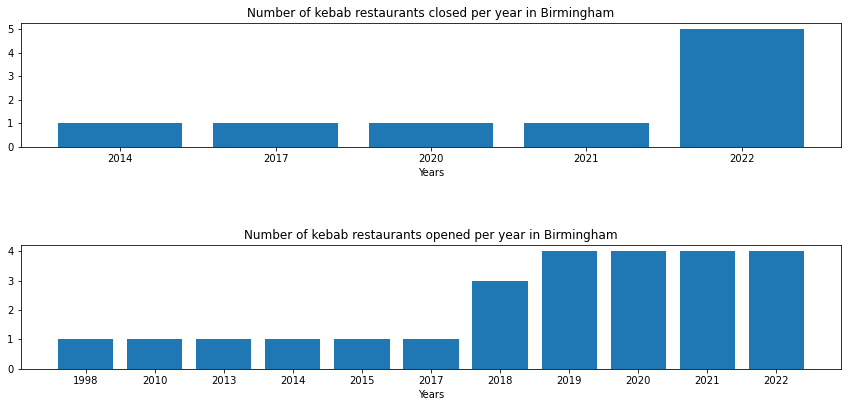

In [24]:
closed_birmingham_kebab = []
opened_birmingham_kebab = []

for restaurant in kebab_birmingham:
    if "date_of_cessation" in restaurant:
        closed_birmingham_kebab.append(restaurant["date_of_cessation"][0:4])

print("Number of closed kebab restaurants in Birmingham:", len(closed_birmingham_kebab))
set(closed_birmingham_kebab)
x = Counter(closed_birmingham_kebab)

for restaurant in kebab_birmingham:
    opened_birmingham_kebab.append(restaurant["date_of_creation"][0:4])
    
print("Number of currrently active or closed kebab restaurants in Birmingham:", len(opened_birmingham_kebab))
set(opened_birmingham_kebab)
y = Counter(opened_birmingham_kebab)

plt.subplot(2, 1, 1)
plt.title("Number of kebab restaurants closed per year in Birmingham")
plt.xlabel("Years")
plt.bar(sorted(x.keys()), sorted(x.values()))

plt.subplot(2, 1, 2)
plt.title("Number of kebab restaurants opened per year in Birmingham")
plt.xlabel("Years")
plt.bar(sorted(y.keys()), sorted(y.values()))

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=2, 
                    top=1.5, 
                    wspace=0.1, 
                    hspace=0.8)

In [25]:
length_of_survival_bir = []
for restaurant in kebab_birmingham:
    if "date_of_cessation" in restaurant:
        x = int(restaurant["date_of_cessation"][0:4])
        y = int(restaurant["date_of_creation"][0:4])
        z = x - y
        length_of_survival_bir.append(z)

x = Counter(length_of_survival_bir)
sorted(x.items())

[(0, 1), (1, 2), (2, 4), (3, 1), (5, 1)]

In [26]:
kebab_man = []

for restaurant in kebab_rest:
    if 'locality' in restaurant["address"]:
        if restaurant["address"]["locality"] == "Manchester":
            kebab_man.append(restaurant)
            
len(kebab_man)

26

Number of closed kebab restaurants: 13
Number of currrently active or closed kebab restaurants: 26


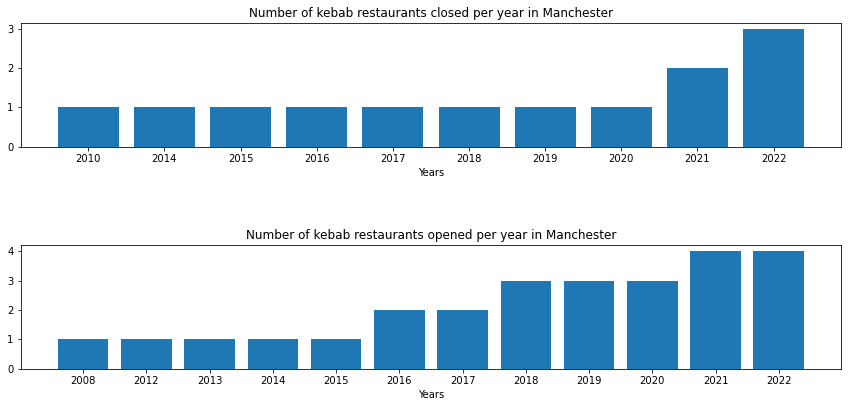

In [27]:
closed_man_kebab = []
opened_man_kebab = []

for restaurant in kebab_man:
    if "date_of_cessation" in restaurant:
        closed_man_kebab.append(restaurant["date_of_cessation"][0:4])
        
print("Number of closed kebab restaurants:", len(closed_man_kebab))
set(closed_man_kebab)
x = Counter(closed_man_kebab)

for restaurant in kebab_man:
    opened_man_kebab.append(restaurant["date_of_creation"][0:4])
    
print("Number of currrently active or closed kebab restaurants:", len(opened_man_kebab))
set(opened_man_kebab)
y = Counter(opened_man_kebab)

plt.subplot(2, 1, 1)
plt.title("Number of kebab restaurants closed per year in Manchester")
plt.xlabel("Years")
plt.bar(sorted(x.keys()), sorted(x.values()))

plt.subplot(2, 1, 2)
plt.title("Number of kebab restaurants opened per year in Manchester")
plt.xlabel("Years")
plt.bar(sorted(y.keys()), sorted(y.values()))

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=2, 
                    top=1.5, 
                    wspace=0.1, 
                    hspace=0.8)

In [28]:
length_of_survival_man = []
for restaurant in kebab_man:
    if "date_of_cessation" in restaurant:
        x = int(restaurant["date_of_cessation"][0:4])
        y = int(restaurant["date_of_creation"][0:4])
        z = x - y
        length_of_survival_man.append(z)

x = Counter(length_of_survival_man)
sorted(x.items())

[(0, 1), (1, 6), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1)]

In [29]:
kebab_gla = []

for restaurant in kebab_rest:
    if 'locality' in restaurant["address"]:
        if restaurant["address"]["locality"] == "Glasgow":
            kebab_gla.append(restaurant)
            

Number of closed kebab restaurants in Glasgow: 13
Number of currrently active or closed kebab restaurants in Glasgow: 21


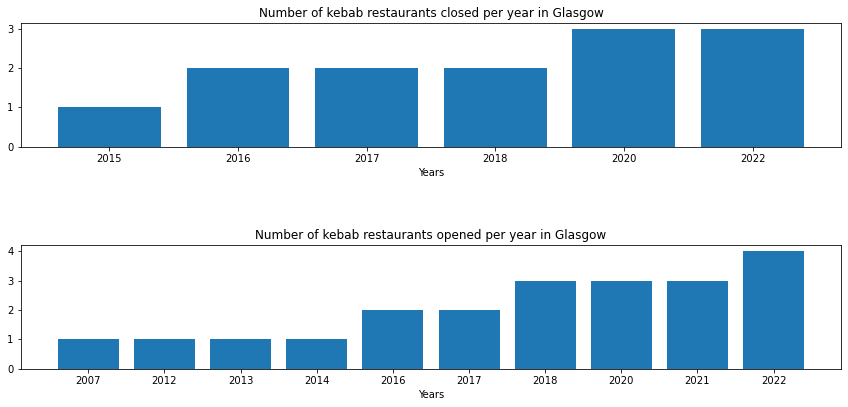

In [30]:
closed_gla_kebab = []
opened_gla_kebab = []

for restaurant in kebab_gla:
    if "date_of_cessation" in restaurant:
        closed_gla_kebab.append(restaurant["date_of_cessation"][0:4])
        
print("Number of closed kebab restaurants in Glasgow:", len(closed_gla_kebab))
set(closed_gla_kebab)
x = Counter(closed_gla_kebab)

for restaurant in kebab_gla:
    opened_gla_kebab.append(restaurant["date_of_creation"][0:4])
    
print("Number of currrently active or closed kebab restaurants in Glasgow:", len(opened_gla_kebab))
set(opened_gla_kebab)
y = Counter(opened_gla_kebab)

plt.subplot(2, 1, 1)
plt.title("Number of kebab restaurants closed per year in Glasgow")
plt.xlabel("Years")
plt.bar(sorted(x.keys()), sorted(x.values()))

plt.subplot(2, 1, 2)
plt.title("Number of kebab restaurants opened per year in Glasgow")
plt.xlabel("Years")
plt.bar(sorted(y.keys()), sorted(y.values()))

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=2, 
                    top=1.5, 
                    wspace=0.1, 
                    hspace=0.8)

In [31]:
length_of_survival_gla = []
for restaurant in kebab_gla:
    if "date_of_cessation" in restaurant:
        x = int(restaurant["date_of_cessation"][0:4])
        y = int(restaurant["date_of_creation"][0:4])
        z = x - y
        length_of_survival_gla.append(z)

x = Counter(length_of_survival_gla)
sorted(x.items())

[(1, 1), (2, 5), (4, 4), (5, 1), (7, 1), (8, 1)]

Opening a restaurant is a risky business decision. There are many factors needed to be considered. Investing in a new restaurant can be rewarding if the location is chosen accordingly. For this assignment, the data of 1000 kebab restaurants in the U.K. are pulled from the Companies House dataset. Out of 1000 restaurants, 176, 26, 24, and 19 were in London, Birmingham, Manchester, and Glasgow, respectfully. When combined, nearly a quarter of the total restaurants are located in these four cities. For London, 62 of the 176 (35.22%) restaurants were shut down at some point. From the box plot in code, it can be seen that in 2021, the shutdowns have risen dramatically from the previous years. 20 of the 62 closed restaurants were closed within their first year of establishment. Birmingham performs slightly better in the closed/(total restaurants) ratio with 30.76%. Among the closed restaurants in Birmingham, the majority ended operations after three years of opening. For Manchester and Glasgow, closed/(total restaurants) ratios are 50% and 63% respectively, The closure of even long-running restaurants in Manchester and Glasgow will negatively affect investors. Given current statistics, Birmingham is the best option for kebab restaurant investment.

# Question 3: Is Lifespan of Cryptocurrency Companies Short?

In [32]:
crypto_comp = search_for_companies_with_query("crypto", 900)
exchange_comp = search_for_companies_with_query("gold", 900)

requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=0
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=100
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=200
status code is not 'SUCCESS 200'. Will wait 20 seconds
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=200
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=300
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=400
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=500
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&start_index=600
requesting: https://api.companieshouse.gov.uk/search/companies?q=crypto&items_per_page=100&

In [33]:
ceased_year_crypto_comp = []
founded_year_crypto_comp = []
crypto_lifespan = []

for company in crypto_comp:
    if "date_of_cessation" in company:
        
        ceased_year_crypto_comp.append(company["date_of_cessation"][0:4])
        founded_year_crypto_comp.append(company["date_of_creation"][0:4])
        crypto_lifespan.append(int(company["date_of_cessation"][0:4]) - int(company["date_of_creation"][0:4]))

In [34]:
print("Out of 900 crypto companies,", len(ceased_year_crypto_comp), "of them were ceased")
print("Lifespan of crypto companies are:", mean(crypto_lifespan))

Out of 900 crypto companies, 521 of them were ceased
Lifespan of crypto companies are: 1.7562380038387715


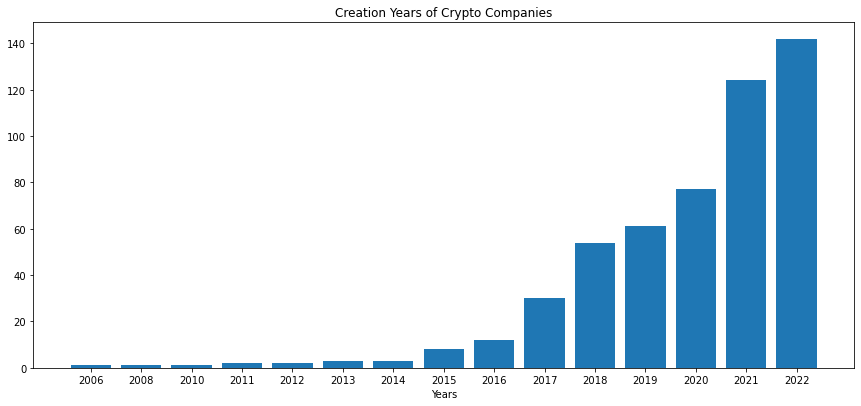

In [35]:
Counter(founded_year_crypto_comp).most_common()
plt.title("Creation Years of Crypto Companies")
plt.xlabel("Years")
plt.bar(sorted(Counter(founded_year_crypto_comp).keys()), sorted(Counter(founded_year_crypto_comp).values()))
plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=2, 
                    top=1.5, 
                    wspace=0.1, 
                    hspace=0.8)

<BarContainer object of 10 artists>

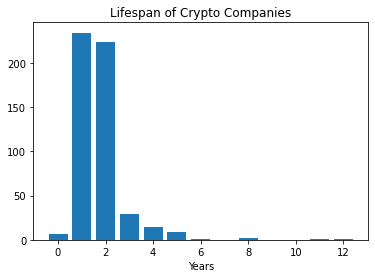

In [36]:
plt.title("Lifespan of Crypto Companies")
plt.xlabel("Years")
plt.bar((Counter(crypto_lifespan).keys()), (Counter(crypto_lifespan).values()))

In [37]:
ceased_year_exchange_comp = []
founded_year_exchange_comp = []
exchange_lifespan = []

for company in exchange_comp:
    if "date_of_cessation" in company:
        
        ceased_year_exchange_comp.append(company["date_of_cessation"][0:4])
        founded_year_exchange_comp.append(company["date_of_creation"][0:4])
        exchange_lifespan.append(int(company["date_of_cessation"][0:4]) - int(company["date_of_creation"][0:4]))

In [38]:
print("Out of 900 exchange companies,", len(ceased_year_exchange_comp), "of them were ceased")
print("Lifespan of exchange companies are:", mean(exchange_lifespan))

Out of 900 exchange companies, 93 of them were ceased
Lifespan of exchange companies are: 3.032258064516129


<BarContainer object of 14 artists>

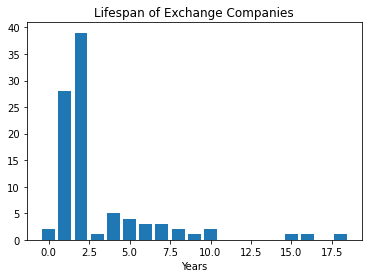

In [39]:
plt.title("Lifespan of Exchange Companies")
plt.xlabel("Years")
plt.bar((Counter(exchange_lifespan).keys()), (Counter(exchange_lifespan).values()))

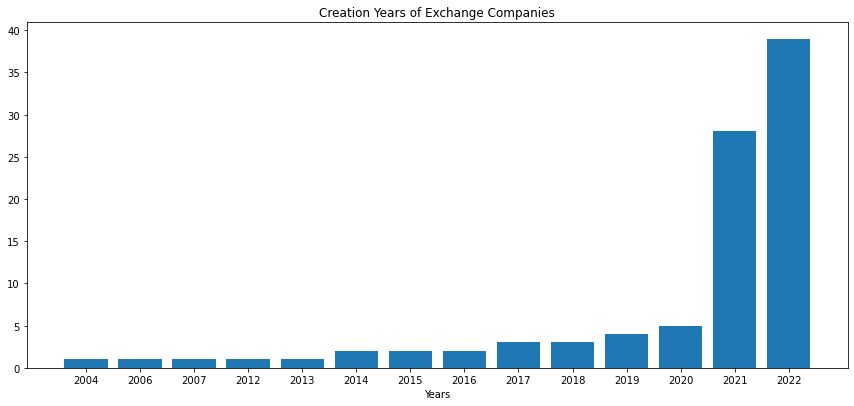

In [40]:
Counter(founded_year_exchange_comp).most_common()
plt.title("Creation Years of Exchange Companies")
plt.xlabel("Years")
plt.bar(sorted(Counter(founded_year_exchange_comp).keys()), sorted(Counter(founded_year_exchange_comp).values()))
plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=2, 
                    top=1.5, 
                    wspace=0.1, 
                    hspace=0.8)

In recent years, terms such as crypto technology, cryptocurrency, and blockchain have become highly popular worldwide. Started as a decentralized and anonymous way of money transaction, this technology is used by millions of people nowadays, whether the user's goal is making money by trading cryptocurrencies or not. The popularisation of the technology brought many investors to the scene to launch crypto companies; however, not all of them survived many years. In this report, information for crypto and exchange companies was pulled. From the pulled 900 crypto companies, 413 were closed within years, whereas for 900 exchange companies, only 98 were closed. Comparing these two ratios as a percentage, 45.88% of crypto companies and 10.88% of exchange companies were shut down eventually. Lifespans of the closed crypto companies are short; 87% of the ceased crypto companies were shut down within two years of their creation. This percentage is 68% for exchange companies. The average lifespan for closed crypto and exchange companies is 1.75 and 3.14 years, respectively. Statistics generated from the code show that the lifespan of crypto companies is less than exchange companies, and overall, crypto companies perform worse than exchange companies in terms of survival.